## Критерии Стьюдента

In [8]:
import numpy as np
import pandas as pd
import scipy
import statsmodels
from statsmodels.stats.weightstats import *

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [4]:
data = pd.read_csv('ADHD.txt', sep=' ', header=0)
data.columns = ['Placebo', 'Drug']

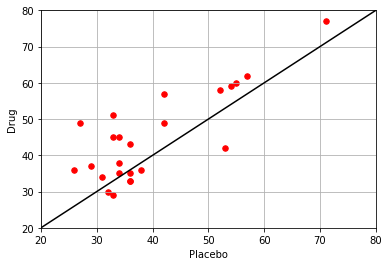

In [5]:
data.plot.scatter('Placebo', 'Drug', c='r', s=30)
pylab.grid()
pylab.plot(range(100), c='black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

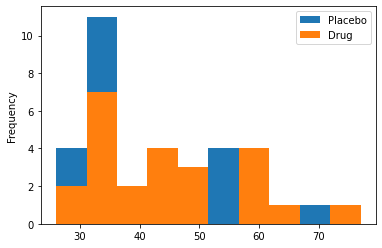

In [6]:
data.plot.hist()
pylab.show()

## Одновыборочный критерий Стьюдента

Проверим, что пациенты действительно нуждаются в лечении. То есть, что их способность к подавлению импульсивных поведеньческих реакций (\[0, 100\]) не равна 50.

H0: среднее значение способности подавлять импульсивные поведенческие реакции равно 50   
H1: не равно

In [10]:
stats.ttest_1samp(data['Placebo'], 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

p-value = 0.00018   =>  нулевая гипотеза отвергается в пользу альтернативы 

In [11]:
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


По интервалу также видно, что в него не входит значение 50, что тоже подтверждает, что на самом деле пациенты нуждаются в лечении

## Двухвыборочный критерий Стьюдента (независимые выборки)

(на самом деле, мы знаем, что выборки связанные, но чтобы потренироваться, попробуем сначала посчитать так)

Для того, чтобы использовать критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормального. Для этого построим QQ график.

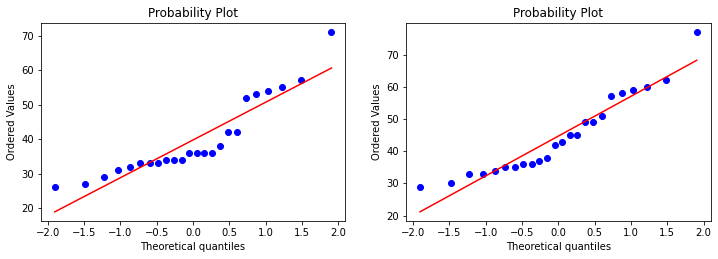

In [13]:
pylab.figure(figsize=(12, 8))
pylab.subplot(2, 2, 1)
stats.probplot(data['Placebo'], dist='norm', plot=pylab)
pylab.subplot(2, 2, 2)
stats.probplot(data['Drug'], dist='norm', plot=pylab)
pylab.show()

Мы видим, что отличие от нормального распределения не существенное, но давайте лучше проверим это еще и количественно, а именно при помощи критерия Шапиро-Уилка:

H0: способности к подавлению реакций распределены нормально  
H1: не нормально

In [16]:
placebo_res = stats.shapiro(data.Placebo)
print("W-statistics: %f, p-value: %f" % placebo_res)

W-statistics: 0.857487, p-value: 0.003020


In [17]:
drug_res = stats.shapiro(data.Drug)
print("W-statistics: %f, p-value: %f" % drug_res)

W-statistics: 0.916445, p-value: 0.048768


Мы видим, что P-value меньше 0.05 в обоих случаях, следовательно, распределения всё-таки отличаются от нормального. Но, глядя на QQ графики, можно заметить, что отличаются не сильно, так что попробуем всё-равно посчитать критерий Стьюдента

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы

In [18]:
scipy.stats.ttest_ind(data.Placebo, data.Drug, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [19]:
cm = CompareMeans(DescrStatsW(data.Drug), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


Так как p-value большой, нулевую гипотезу отвергнуть нельзя, однако, если посмотреть на доверительный интервал, то можно заметить, что 0 в него всё-таки входит, так что однозначно сказать нельзя.

## Двухвыборочный критерий Стьюдента (зависмые выборки)

Так как на самом деле выборки у нас связанные, то проверим, что распределение попарных разностей существенно не отличается от нормального.

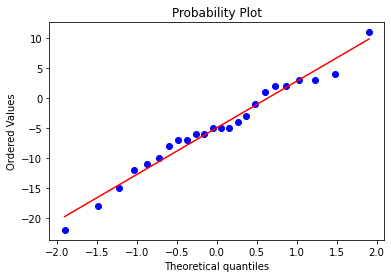

In [20]:
stats.probplot(data.Placebo - data.Drug, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:  
H0: попарные разности распределены нормально  
H1: не нормально

In [21]:
result = stats.shapiro(data.Drug - data.Placebo)
print('W-statistics: %f, p-value: %f' % result)

W-statistics: 0.979806, p-value: 0.892254


p-value получился большой => мы не можем отвергнуть нулевую гипотезу => примем распределение схожим с нормальным

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [24]:
stats.ttest_rel(data.Drug, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [25]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Drug - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


Мы видим, что p-value получилось < уровня значимости в 0.05 => мы можем отвергнуть нулевую гипотезу в пользу альтернативы, то есть, сделать вывод, что лекарство действительно влияет на способность к подавлению импульсивных поведенческих реакций.

Доверительный интервал находится правее 0 => тоже подтверждает, что разница между плацебо и приемом препарата действительно есть